The three players A, B and C are playing the following game. First A puts a point on a circle, then B puts his point and then the player C does. B knows which point did A pick, and C knows which points A and B picked when making their own decisions. After all three choices are made, a point X is drawn at random on a circle. The winner is a player whose chosen point appears to be the closest to X. How should B make her choice if she want to maximize the probability of winning?

We will test the following strategies:
    - Main strategy
    - Place a point randomly
    
Assumptions:
    - Player A places the point randomly (since there is no difference at that point)
    - Player B
        - doesn't have a strategy
        - has one of three strategies
            - place a point at angle 0-90 away from player A
            - place a point at angle 90-180 away from player A
            - place a point at angle 180 from player A (diameter strategy)
            
Player C strategy test will involve combinations of main and random strategy against Player B's strategies

500,000 sample simulation will be conducted to measure how often each player wins

Side effect - conclusion on whether each of Player B's strategies is effective

## Strategy
Place the point equidistant from point A and B maximizing the distance (on the other side of the circle)

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def angle_distance(x,y):
    a = x - y
    a = (a + 180) % 360 - 180
    return abs(a)

def angle_midpoint(x,y):
    vals = [x, y]
    vals.sort(reverse = False)
    x, y = vals
    a = x - y

    a = (a) % 360
    if a < 90:
        return ((abs(a) + 180) / 2) + y
    else:
        return ((abs(a)) / 2) + y
    
def angle_distance_2(x,y):
    a = x - y
    a = (a - 180) % 360 + 180
    return ((a/2) + y) % 360

def plot_circle(p_x, p_y):
    num_samples = 1000
    theta = np.linspace(0, 2*np.pi, num_samples)
    a, b = 1 * np.cos(theta), 1 * np.sin(theta)

    plt.figure(figsize=(7,7))
    plt.plot(a, b, linestyle='-', linewidth=2)
    dict_vals = {"A" : p_x,"B" : p_y,"C" : angle_distance_2(p_x, p_y)}
    for i in dict_vals.items():
        nu_theta = math.radians(i[1])
        y, x = np.cos(nu_theta), np.sin(nu_theta)
        plt.plot(x, y, marker='o', linestyle=':', label=i[0])

    plt.ylim([-1.5,1.5])
    plt.xlim([-1.5,1.5])
    plt.grid()
    plt.legend(loc='upper right')
    plt.show(block=True)

Execution of the strategy can be seen below

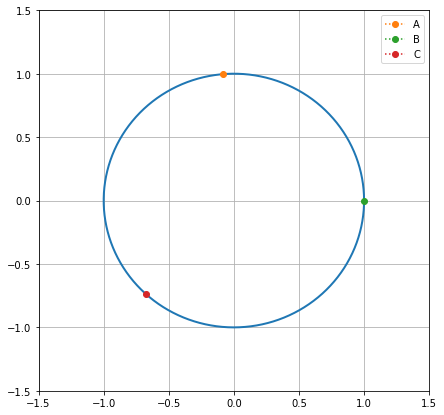

In [4]:
plot_circle(355, 90)

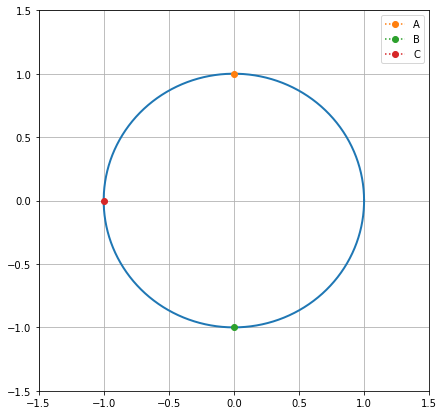

In [5]:
plot_circle(0, 180)

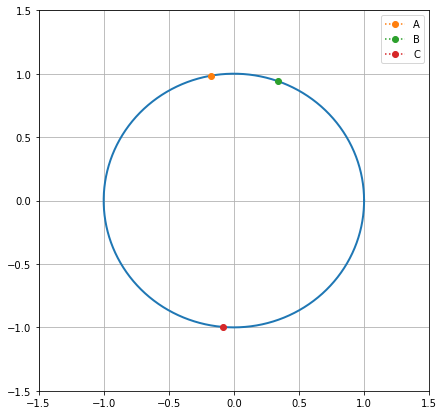

In [6]:
plot_circle(350, 20)

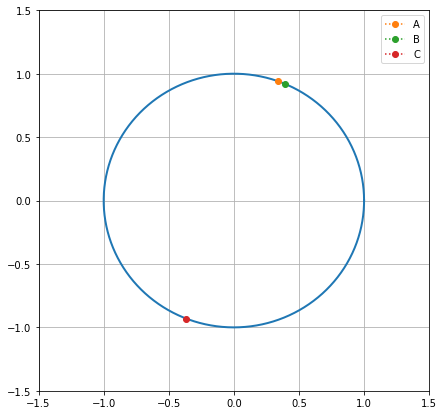

In [8]:
plot_circle(20, 23)

## Strategy test
### B puts the point randomly put the point randomly
### We use equidistant strategy

In [9]:
A = np.random.rand((500000)) * 360
B = np.random.rand((500000)) * 360
a_b_data = pd.concat([pd.Series(A), pd.Series(B)], axis = 1)
a_b_data = a_b_data.rename({0: "A", 1: "B"}, axis = "columns")
a_b_data["C"] = a_b_data.apply(lambda x: angle_distance_2(x["A"], x["B"]), axis = 1)
a_b_data["X"] = pd.Series(np.random.rand((500000)) * 360)
a_b_data["distance_A"] = a_b_data.apply(lambda x: angle_distance(x["A"], x["X"]), axis = 1)
a_b_data["distance_B"] = a_b_data.apply(lambda x: angle_distance(x["B"], x["X"]), axis = 1)
a_b_data["distance_C"] = a_b_data.apply(lambda x: angle_distance(x["C"], x["X"]), axis = 1)

We win 37% of 500k games

In [11]:
### WE WIN
((a_b_data["distance_C"] > a_b_data["distance_A"] )& (a_b_data["distance_C"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.37404

Player A wins 31% of 500k games

In [12]:
### A WINS
((a_b_data["distance_A"] > a_b_data["distance_C"] )& (a_b_data["distance_A"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.312468

Player B wins 31% of 500k games

In [14]:
### B WINS
((a_b_data["distance_B"] > a_b_data["distance_A"] )& (a_b_data["distance_B"] > a_b_data["distance_C"])).sum() / a_b_data.shape[0]

0.313492

### B puts the point randomly put the point randomly
### We put the point randomly

In [15]:
a_b_data["C"] = pd.Series(np.random.rand((500000)) * 360)
a_b_data["distance_C"] = a_b_data.apply(lambda x: angle_distance(x["C"], x["X"]), axis = 1)

We win 33% of 500k games

In [16]:
### WE WIN
((a_b_data["distance_C"] > a_b_data["distance_A"] )& (a_b_data["distance_C"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.333718

Player A wins 33% of 500k games

In [17]:
### A WINS
((a_b_data["distance_A"] > a_b_data["distance_C"] )& (a_b_data["distance_A"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.332864

Player B wins 33% of 500k games

In [18]:
### B WINS
((a_b_data["distance_B"] > a_b_data["distance_A"] )& (a_b_data["distance_B"] > a_b_data["distance_C"])).sum() / a_b_data.shape[0]

0.333418

### B puts the point 0 to 90 degrees away from A
### We use equidistant strategy

In [19]:
A = np.random.rand((500000)) * 360
B = A + np.random.rand(500000)*90
a_b_data = pd.concat([pd.Series(A), pd.Series(B)], axis = 1)
a_b_data = a_b_data.rename({0: "A", 1: "B"}, axis = "columns")
a_b_data["C"] = a_b_data.apply(lambda x: angle_distance_2(x["A"], x["B"]), axis = 1)
a_b_data["X"] = pd.Series(np.random.rand((500000)) * 360)
a_b_data["distance_A"] = a_b_data.apply(lambda x: angle_distance(x["A"], x["X"]), axis = 1)
a_b_data["distance_B"] = a_b_data.apply(lambda x: angle_distance(x["B"], x["X"]), axis = 1)
a_b_data["distance_C"] = a_b_data.apply(lambda x: angle_distance(x["C"], x["X"]), axis = 1)

We win 43% of 500k games

In [20]:
### WE WIN
((a_b_data["distance_C"] > a_b_data["distance_A"] )& (a_b_data["distance_C"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]


0.438728

Player A wins 28% of 500k games

In [21]:
### A WINS
((a_b_data["distance_A"] > a_b_data["distance_C"] )& (a_b_data["distance_A"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]


0.28105

Player B wins 28% of 500k games

In [22]:
### B WINS
((a_b_data["distance_B"] > a_b_data["distance_A"] )& (a_b_data["distance_B"] > a_b_data["distance_C"])).sum() / a_b_data.shape[0]


0.280222

### B puts the point 0 to 90 degrees away from A
### We put the point randomly

In [23]:
a_b_data["C"] = pd.Series(np.random.rand((500000)) * 360)
a_b_data["distance_C"] = a_b_data.apply(lambda x: angle_distance(x["C"], x["X"]), axis = 1)

We win 39% of 500k games

In [24]:
### WE WIN
((a_b_data["distance_C"] > a_b_data["distance_A"] )& (a_b_data["distance_C"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.396424

Player A wins 30% of 500k games

In [25]:
### A WINS
((a_b_data["distance_A"] > a_b_data["distance_C"] )& (a_b_data["distance_A"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.302766

Player B wins 30% of 500k games

In [26]:
### B WINS
((a_b_data["distance_B"] > a_b_data["distance_A"] )& (a_b_data["distance_B"] > a_b_data["distance_C"])).sum() / a_b_data.shape[0]

0.30081

### B puts the point 90 to 180 degrees away from A
### We use equidistant strategy

In [27]:
A = np.random.rand((500000)) * 360
B = A + np.random.rand(500000)*90 + 90

a_b_data = pd.concat([pd.Series(A), pd.Series(B)], axis = 1)
a_b_data = a_b_data.rename({0: "A", 1: "B"}, axis = "columns")
a_b_data["C"] = a_b_data.apply(lambda x: angle_distance_2(x["A"], x["B"]), axis = 1)
a_b_data["X"] = pd.Series(np.random.rand((500000)) * 360)
a_b_data["distance_A"] = a_b_data.apply(lambda x: angle_distance(x["A"], x["X"]), axis = 1)
a_b_data["distance_B"] = a_b_data.apply(lambda x: angle_distance(x["B"], x["X"]), axis = 1)
a_b_data["distance_C"] = a_b_data.apply(lambda x: angle_distance(x["C"], x["X"]), axis = 1)

We win 31% of 500k games
##### FIRST CASE OF STRATEGY LOSING RELATIVELY TO OTHER PLAYERS

In [28]:
### WE WIN
((a_b_data["distance_C"] > a_b_data["distance_A"] )& (a_b_data["distance_C"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.312014

Player A wins 34% of 500k games

In [29]:
### A WINS
((a_b_data["distance_A"] > a_b_data["distance_C"] )& (a_b_data["distance_A"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.345212

Player B wins 34% of 500k games

In [30]:
### B WINS
((a_b_data["distance_B"] > a_b_data["distance_A"] )& (a_b_data["distance_B"] > a_b_data["distance_C"])).sum() / a_b_data.shape[0]

0.342774

### B puts the point 90 to 180 degrees away from A
### We put the point randomly

In [32]:
a_b_data["C"] = pd.Series(np.random.rand((500000)) * 360)
a_b_data["distance_C"] = a_b_data.apply(lambda x: angle_distance(x["C"], x["X"]), axis = 1)

We win 27% of 500k games

In [33]:
### WE WIN
((a_b_data["distance_C"] > a_b_data["distance_A"] )& (a_b_data["distance_C"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.271056

Player A wins 36% of 500k games

In [34]:
### A WINS
((a_b_data["distance_A"] > a_b_data["distance_C"] )& (a_b_data["distance_A"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.36561

Player B wins 36% of 500k games

In [35]:
### B WINS
((a_b_data["distance_B"] > a_b_data["distance_A"] )& (a_b_data["distance_B"] > a_b_data["distance_C"])).sum() / a_b_data.shape[0]

0.363334

### B puts the point 180 degrees away from A
### We use equidistant strategy

In [36]:
A = np.random.rand((500000)) * 360
B = A + 180

a_b_data = pd.concat([pd.Series(A), pd.Series(B)], axis = 1)
a_b_data = a_b_data.rename({0: "A", 1: "B"}, axis = "columns")
a_b_data["C"] = a_b_data.apply(lambda x: angle_distance_2(x["A"], x["B"]), axis = 1)
a_b_data["X"] = pd.Series(np.random.rand((500000)) * 360)
a_b_data["distance_A"] = a_b_data.apply(lambda x: angle_distance(x["A"], x["X"]), axis = 1)
a_b_data["distance_B"] = a_b_data.apply(lambda x: angle_distance(x["B"], x["X"]), axis = 1)
a_b_data["distance_C"] = a_b_data.apply(lambda x: angle_distance(x["C"], x["X"]), axis = 1)

We win 24% of 500k games

In [37]:
### WE WIN
((a_b_data["distance_C"] > a_b_data["distance_A"] )& (a_b_data["distance_C"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.24949

Player A wins 37% of 500k games

In [38]:
### A WINS
((a_b_data["distance_A"] > a_b_data["distance_C"] )& (a_b_data["distance_A"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.375164

Player B wins 37% of 500k games

In [39]:
### B WINS
((a_b_data["distance_B"] > a_b_data["distance_A"] )& (a_b_data["distance_B"] > a_b_data["distance_C"])).sum() / a_b_data.shape[0]

0.375346

### B puts the point 180 degrees away from A
### We put the point randomly

In [40]:
a_b_data["C"] = pd.Series(np.random.rand((500000)) * 360)
a_b_data["distance_C"] = a_b_data.apply(lambda x: angle_distance(x["C"], x["X"]), axis = 1)

We win 25% of 500k games

In [41]:
### WE WIN
((a_b_data["distance_C"] > a_b_data["distance_A"] )& (a_b_data["distance_C"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.250908

Player A wins 37% of 500k games

In [42]:
### A WINS
((a_b_data["distance_A"] > a_b_data["distance_C"] )& (a_b_data["distance_A"] > a_b_data["distance_B"])).sum() / a_b_data.shape[0]

0.374026

Player B wins 37% of 500k games

In [43]:
### B WINS
((a_b_data["distance_B"] > a_b_data["distance_A"] )& (a_b_data["distance_B"] > a_b_data["distance_C"])).sum() / a_b_data.shape[0]

0.375066

## Conclusion

Our strategy wins against other players on average whenever Player B puts a point not further than 90 degrees away from Player A

It's 4% better than random when Player B is within 90-180 range away from Player A

It's basically as good as random when player B is 180 away from player A.

#### Player B optimal strategy
Divide and conquer - always put a point 180 degrees away from player A

## Meta strategy
- As long as player B is close to A - always use the strategy
- If we notice random behavior from player B - always use the strategy
- As long as player B is not 180 away from A - use the strategy

If B is 180 away from A - can place the point randomly